# Assignment 2
## Topics 4 - 5


This assignment is performed **in pairs** following the *Groups for Assignments* list.

To turn the assignment in, upload it to the task that has been created in moodle before midnight on Monday, November 14.

--- 



## 1. Introduction
<p>In the world of Pokémon academia, one name towers above any other – Professor Samuel Oak. While his colleague Professor Elm specializes in Pokémon evolution, Oak has dedicated his career to understanding the relationship between Pokémon and their human trainers. A former trainer himself, the professor has first-hand experience of how obstinate Pokémon can be – particularly when they hold legendary status.</p>
<p>For his latest research project, Professor Oak has decided to investigate the defining characteristics of legendary Pokémon to improve our understanding of their temperament. Hearing of our expertise in classification problems, he has enlisted us as the lead researchers.</p>
<p>Our journey begins at the professor's research lab in Pallet Town, Kanto. The first step is to open up the Pokédex, an encyclopaedic guide to 801 Pokémon from all seven generations.</p>
<p><img src="https://assets.datacamp.com/production/project_712/img/legendary_pokemon.jpg" alt="Legendary Pokémon"></p>
<p><em>Source: <a href="https://www.flickr.com/photos/bagogames/">bagogames</a> on Flickr</em></p>

These are the variables in the *Pokemon* dataset (*pokedex.csv*):

- **pokedex_number**: The entry number of the Pokemon in the National Pokedex
- **name**: The English name of the Pokemon
- **attack**: The Base Attack of the Pokemon
- **defense**: The Base Defense of the Pokemon
- **height_m**: Height of the Pokemon in metres
- **hp**: The Base HP of the Pokemon
- **percentage_male**: The percentage of the species that are male. Blank if the Pokemon is genderless.
- **sp_attack**: The Base Special Attack of the Pokemon
- **sp_defense**: The Base Special Defense of the Pokemon
- **speed**: The Base Speed of the Pokemon
- **type1**: The Primary Type of the Pokemon
- **weight_kg**: The Weight of the Pokemon in kilograms
- **generation**: The numbered generation which the Pokemon was first introduced
- **is_legendary**: Denotes if the Pokemon is legendary.


### Load your data and take a look at it

In [2]:
# YOUR CODE HERE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
Pokedex = pd.read_csv('pokedex.csv', sep=',', index_col=0)
display(Pokedex)

,name,attack,defense,height_m,hp,percentage_male,sp_attack,sp_defense,speed,type,weight_kg,generation,is_legendary
pokedex_number,,,,,,,,,,,,,
1,Bulbasaur,49,49,0.7,45,88.1,65,65,45,grass,6.9,1,0
2,Ivysaur,62,63,1.0,60,88.1,80,80,60,grass,13.0,1,0
3,Venusaur,100,123,2.0,80,88.1,122,120,80,grass,100.0,1,0
4,Charmander,52,43,0.6,39,88.1,60,50,65,fire,8.5,1,0
5,Charmeleon,64,58,1.1,58,88.1,80,65,80,fire,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,Celesteela,101,103,9.2,97,NaN,107,101,61,steel,999.9,7,1
798,Kartana,181,131,0.3,59,NaN,59,31,109,grass,0.1,7,1
799,Guzzlord,101,53,5.5,223,NaN,97,53,43,dark,888.0,7,1


## 2. How many Pokémon are legendary? (0.25 points)
<p>After browsing the Pokédex, we can see several variables that could feasibly explain what makes a Pokémon legendary. We have a series of numerical fighter stats – <code>attack</code>, <code>defense</code>, <code>speed</code> and so on – as well as a categorization of Pokemon <code>type</code> (bug, dark, dragon, etc.). <code>is_legendary</code> is the binary classification variable we will eventually be predicting, tagged <code>1</code> if a Pokémon is legendary and <code>0</code> if it is not.</p>
<p>Before we explore these variables in any depth, let's find out how many Pokémon are legendary out of the 801 total.

In [3]:
# YOUR CODE HERE
Pokedex['is_legendary'].sum()

70

## 3. Legendary Pokémon by height and weight (0.5 points)
<p>We now know that there are **INSERT HERE** legendary Pokémon – a sizable minority at **INSERT HERE**% of the population! Let's start to explore some of their distinguishing characteristics.</p>
<p>First of all, we'll plot the relationship between <code>height_m</code> and <code>weight_kg</code> for all 801 Pokémon, highlighting those that are classified as legendary. We'll also add conditional labels to the plot, which will only print a Pokémon's name if it is taller than 7.5m or heavier than 600kg.</p>

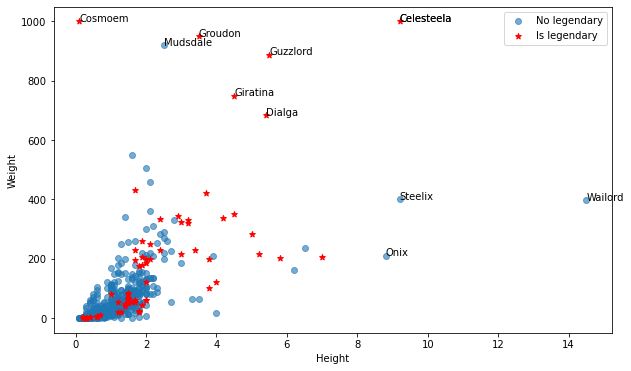

In [45]:
# YOUR CODE HERE
plt.figure(figsize=(10,6))
plt.scatter(Pokedex['height_m'][Pokedex['is_legendary']==0],Pokedex['weight_kg'][Pokedex['is_legendary']==0],alpha=0.6,label='No legendary')
plt.scatter(Pokedex['height_m'][Pokedex['is_legendary']==1],Pokedex['weight_kg'][Pokedex['is_legendary']==1],marker='*',color='red', label='Is legendary')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()

#Adding names
ind1 = Pokedex['height_m']>7.5 
ind2 = Pokedex['weight_kg']>600
x=Pokedex['height_m'][ind1]
y=Pokedex['weight_kg'][ind1]
l=Pokedex['name'][ind1]

for i,label in enumerate(l):
    plt.annotate(label, (x.values[i], y.values[i]))
    
x1=Pokedex['height_m'][ind2]
y1=Pokedex['weight_kg'][ind2]  
l1=Pokedex['name'][ind2]
for i,label in enumerate(l1):
    plt.annotate(label, (x1.values[i], y1.values[i]))

## 4. Legendary Pokémon by type (0.5 points)
<p>It seems that legendary Pokémon are generally **INSERT HERE** and **INSERT HERE**, but with many exceptions. For example, Onix (Gen 1), Steelix (Gen 2) and Wailord (Gen 3) are all extremely **INSERT HERE**, but none of them have legendary status. There must be other factors at play.</p>
<p>We will now look at the effect of a Pokémon's <code>type</code> on its legendary/non-legendary classification. There are **INSERT HERE** possible types, ranging from the common (Grass / Normal / Water) to the rare (Fairy / Flying / Ice). We will calculate the proportion of legendary Pokémon within each category, and then plot these proportions using a simple bar chart.</p>

Number of Pokèmon types: 18


'Proportion of Legendaries of each type'

[('grass', 0.05128205128205128),
 ('fire', 0.09615384615384616),
 ('water', 0.05263157894736842),
 ('bug', 0.041666666666666664),
 ('normal', 0.02857142857142857),
 ('poison', 0.0),
 ('electric', 0.1282051282051282),
 ('ground', 0.0625),
 ('fairy', 0.05555555555555555),
 ('fighting', 0.0),
 ('psychic', 0.32075471698113206),
 ('rock', 0.08888888888888889),
 ('ghost', 0.037037037037037035),
 ('ice', 0.08695652173913043),
 ('dragon', 0.25925925925925924),
 ('dark', 0.10344827586206896),
 ('steel', 0.25),
 ('flying', 0.3333333333333333)]

<BarContainer object of 18 artists>

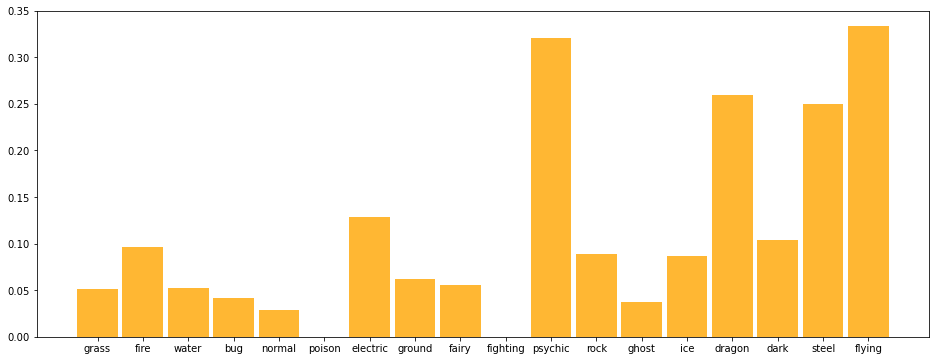

In [5]:
# YOUR CODE HERE
#Calculating the proportion of legendary Pokemon
print('Number of Pokèmon types:',len(Pokedex['type'].unique()))
Pokedex['type'].value_counts()


Percentage_list=[]
for i in Pokedex['type'].unique():
    ind = Pokedex['type']==i
    l1 = len(Pokedex[ind])
    l2 = len(Pokedex[ind & Pokedex['is_legendary']==1])
    Percentage_list.append((i,l2/l1))
    
display('Proportion of Legendaries of each type',Percentage_list)

#Plot
x=[]
y=[]
for i in Percentage_list:
    x.append(i[0])
    y.append(i[1])
plt.figure(figsize=(16,6))
plt.bar(x,y, align='center',width=0.9, color='orange',alpha=0.8)

## 5. Legendary Pokémon by fighter stats (0.5 points)
<p>There are clear differences between Pokémon types in their relation to legendary status. While more than INSERT HERE% of flying and psychic Pokémon are legendary, there is no such thing as a legendary poison or fighting Pokémon!</p>
<p>Before fitting the model, we will consider the influence of a Pokémon's fighter stats (<code>attack</code>, <code>defense</code>, etc.) on its status. Rather than considering each stat in isolation, we will produce a boxplot for all of them simultaneously using the <code>facet_wrap()</code> function.</p>

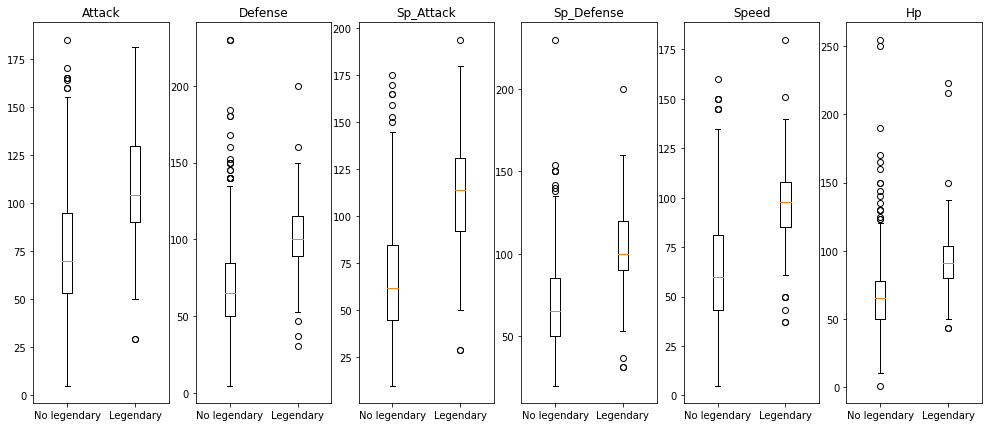

In [6]:
# YOUR CODE HERE
legend=Pokedex['is_legendary']==1
no_legend=Pokedex['is_legendary']==0
#Stats no legendary
a,d,sp_a,sp_d,s,hp=Pokedex['attack'][no_legend],Pokedex['defense'][no_legend],Pokedex['sp_attack'][no_legend],Pokedex['sp_defense'][no_legend],Pokedex['speed'][no_legend],Pokedex['hp'][no_legend]

#Stats legendary
a_l,d_l,sp_a_l,sp_d_l,s_l,hp_l=Pokedex['attack'][legend],Pokedex['defense'][legend],Pokedex['sp_attack'][legend],Pokedex['sp_defense'][legend],Pokedex['speed'][legend],Pokedex['hp'][legend]

attack = [a,a_l]
defense = [d,d_l]
sp_attack = [sp_a,sp_a_l]
sp_defense = [sp_d,sp_d_l]
speed = [s,s_l]
hp = [hp,hp_l]

ticks=['No legendary', 'Legendary']

plt.figure(figsize=(17,7))
plt.subplot(1,6,1)
plt.boxplot(attack)
plt.xticks((1,2),ticks)
plt.title("Attack")

plt.subplot(1,6,2)
plt.boxplot(defense)
plt.xticks((1,2),ticks)
plt.title("Defense")

plt.subplot(1,6,3)
plt.boxplot(sp_attack)
plt.xticks((1,2),ticks)
plt.title("Sp_Attack")

plt.subplot(1,6,4)
plt.boxplot(sp_defense)
plt.xticks((1,2),ticks)
plt.title("Sp_Defense")

plt.subplot(1,6,5)
plt.boxplot(speed)
plt.xticks((1,2),ticks)
plt.title("Speed")

plt.subplot(1,6,6)
plt.boxplot(hp)
plt.xticks((1,2),ticks)
plt.title("Hp")

plt.show()

## 6. Create a training/test split
<p>As we might expect, legendary Pokémon outshine their ordinary counterparts in all fighter stats. Although we haven't formally tested a difference in means, the boxplots suggest a significant difference with respect to all six variables. Nonetheless, there are a number of outliers in each case, meaning that some legendary Pokémon are anomalously weak.</p>
<p>We have now explored all of the predictor variables we will use to explain what makes a Pokémon legendary. Before fitting our model, we will split the <code>pokedex</code> into a training set (<code>pokedex_train</code>) and a test set (<code>pokedex_test</code>). Follow a 80%-20% split. This will allow us to test the model on unseen data.</p>

In [10]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(Pokedex, test_size=0.2, random_state=42)

## 7. Fit a decision tree (1 point)
<p>Now we have our training and test sets, we can go about building our classifier. But before we fit a random forest, we will fit a simple <strong>classification decision tree</strong>. This will give us a baseline fit against which to compare the results of the random forest, as well as an informative graphical representation of the model.</p>

I warn you that you will find a technical problem if you just estimate your tree using the data as-is... What might be going on?

Remember to plot your tree!

In [35]:
# YOUR CODE HERE
y_train = train_set['is_legendary']
x_previous=train_set.loc[:,train_set.columns!="is_legendary"]
x_train = x_previous.loc[:,x_previous.columns!="name"] #name is no important

#Transform 'type' data in numbers

types = x_train['type']
List = list(enumerate(types.unique()))
for i,j in List:
    x_train = x_train.replace({j: i})

#Change Nan values
median = x_train["percentage_male"].median()
x_train["percentage_male"].fillna(median, inplace=True)
median2 = x_train["weight_kg"].median()
x_train["weight_kg"].fillna(median2, inplace=True)
median3 = x_train["height_m"].median()
x_train["height_m"].fillna(median3, inplace=True)

#Decision tree
from sklearn.tree import DecisionTreeClassifier


tree_clf = DecisionTreeClassifier(max_depth=2, random_state=1812)
tree_clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=1812)

In [43]:
pip install graphviz

In [44]:
from pathlib import Path

IMAGES_PATH = Path() #/ "images" / "decision_trees"


from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=str(IMAGES_PATH / "Pokedex_tree.dot"),  
        feature_names=x_train.columns,
        class_names=["No",'Yes'],
        rounded=True,
        filled=True
    )

from graphviz import Source

Source.from_file(IMAGES_PATH / "Pokedex_tree.dot")

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

Please, provide a comprehensive explanation of your tree. Feel free to support it with information extracted from the tree. Give also an assessment of the goodness-of-fit of the tree.

`# YOUR TEXT HERE`

## 8. Fit a random forest (1 point)
<p>Decision trees are unstable and sensitive to small variations in the data. It therefore makes sense to fit a <strong>random forest</strong> – an ensemble method that averages over several decision trees all at once. This should give us a more robust model that classifies Pokémon with greater accuracy.</p>

In [ ]:
# YOUR CODE HERE


from sklearn.tree import DecisionTreeClassifier


tree_clf = DecisionTreeClassifier(max_depth=2, random_state=1812)
tree_clf.fit(x_train, y_train)

## 9. Assess model fit (1 point)
First, assess how good is this model.

<p>Now, in order to allow direct comparison with the decision tree, we will plot the <strong>ROC curves</strong> for both models, which will visualize their true positive rate (TPR) and false positive rate (FPR) respectively.</p>

In [ ]:
# YOUR CODE HERE


Which model is better?

`# YOUR TEXT HERE`

## 10. Analyze variable importance (0.25 points)
<p>It's clear from the ROC curves that the **INSERT HERE** is a substantially better model, boasting an AUC of **INSERT HERE**% versus the **INSERT HERE**'s **INSERT HERE**%. When calculating variable importance, it makes sense to do so with the best model available, so we'll use the **INSERT HERE** for the final part of our analysis.</p>


In [ ]:
# YOUR CODE HERE


## 11. Other classification methods (2.5 points)

Use some of the models you have learnt to perform the same classification task carried out above. Compare them all!

In [ ]:
# YOUR CODE HERE

## 12. Pokemoooooon, Ensemble!! (1.5 points)

Estimate an ensemble of all the methods above to provide an even better prediction

In [ ]:
# YOUR CODE HERE

## 13. Conclusions (1 point)
Please, write here the conclusions of this wonderful study on legendary Pokémon. Think about it as a real report that you have to handle to your manager (or Pokémon trainer!)

`# YOUR TEXT HERE`

--- 

## Congratulations on completing your research into legendary Pokémon – Professor Oak is excited to share the findings! 
